In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
cols=["Rented Bike count","Hour","Temperature","Humidity","Windspeed","Visibility","Dew point temperature","Solar radiation","Rainfall","Snowfall","Functional Day"]

In [3]:
df=pd.read_csv("SeoulBikeData.csv")

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.drop(['Date','Holiday','Seasons'],axis=1,inplace=True)

In [6]:
df.columns=cols
df['Functional Day']=(df['Functional Day']=="Yes").astype(int)
df=df[df['Hour']==12]

In [7]:
df.head()

,Rented Bike count,Hour,Temperature,Humidity,Windspeed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Functional Day
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [8]:
df.drop(['Hour'],axis=1,inplace=True)

In [9]:
df.head()

,Rented Bike count,Temperature,Humidity,Windspeed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Functional Day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


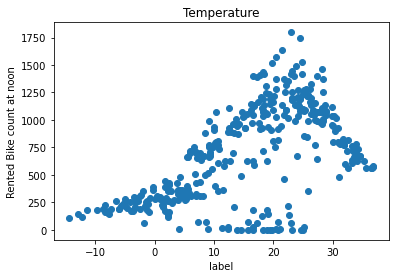

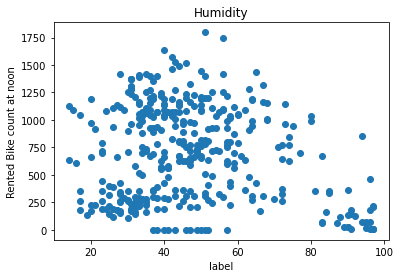

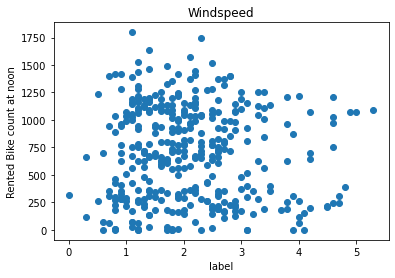

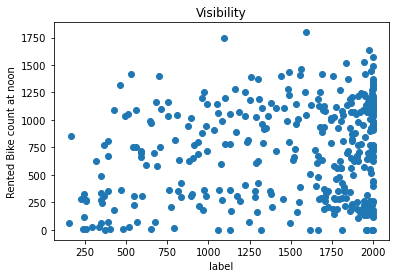

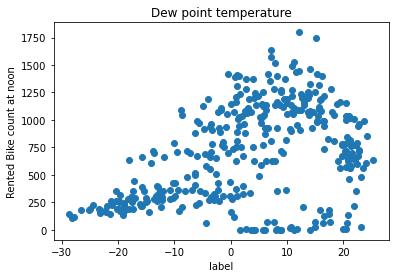

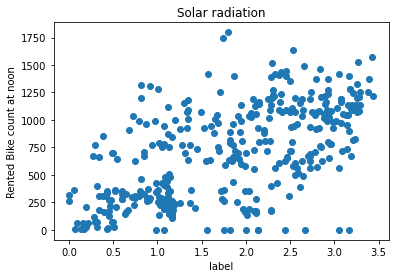

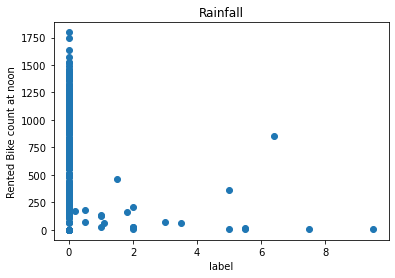

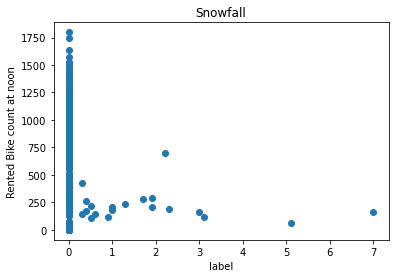

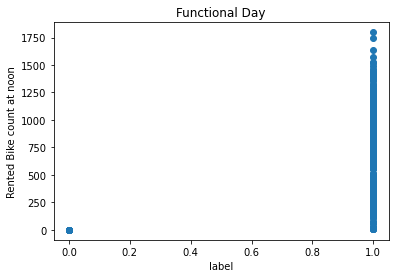

In [10]:
for label in df.columns[1:]:
    plt.scatter(df[label],df['Rented Bike count'])
    plt.title(label)
    plt.ylabel("Rented Bike count at noon")
    plt.xlabel("label")
    plt.show()

In [11]:
#dropping columns which dont seem helpfull
df.drop(['Windspeed','Visibility','Functional Day'],axis=1,inplace=True)

In [12]:
df.head()

,Rented Bike count,Temperature,Humidity,Dew point temperature,Solar radiation,Rainfall,Snowfall
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train,Test,Validation split

In [13]:
train,val,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

### Simple Linear Regression

In [14]:
def get_xy(dataframe,y_label,x_label=None):
    dataframe=copy.deepcopy(df)
    if not x_label:
        x=dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if(len(x_label)==1):
            x=dataframe[x_label[0]].values.reshape(-1,1)
        else:
            x=dataframe[x_label].values
            
    y=dataframe[y_label].values.reshape(-1,1)
    data=np.hstack((x,y))
    
    return data,x,y

In [15]:
_,x_train_temp,y_train_temp=get_xy(train,'Rented Bike count',x_label=['Temperature'])
_,x_val_temp,y_val_temp=get_xy(val,'Rented Bike count',x_label=['Temperature'])
_,x_test_temp,y_test_temp=get_xy(test,'Rented Bike count',x_label=['Temperature'])

In [16]:
temp_reg=LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)

LinearRegression()

In [17]:
temp_reg.score(x_test_temp,y_test_temp)

0.330867186499053

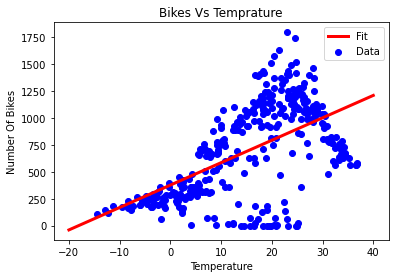

In [18]:
plt.scatter(x_train_temp,y_train_temp,label='Data',color='blue')
x=tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label='Fit',color='red',linewidth=3)
plt.legend()
plt.title('Bikes Vs Temprature')
plt.ylabel("Number Of Bikes")
plt.xlabel("Temperature")
plt.show()

### Multiple Linear regression

In [19]:
def get_xy_all(dataframe,y_label,x_label=None):
    dataframe=copy.deepcopy(df)
    if x_label is None:
        x=dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if(len(x_label)==1):
            x=dataframe[x_label[0]].values.reshape(-1,1)
        else:
            x=dataframe[x_label].values
            
    y=dataframe[y_label].values.reshape(-1,1)
    data=np.hstack((x,y))
    
    return data,x,y

In [20]:
_,x_train_all,y_train_all=get_xy_all(train,'Rented Bike count',x_label=df.columns[1:])
_,x_val_all,y_val_all=get_xy_all(val,'Rented Bike count',x_label=df.columns[1:])
_,x_test_all,y_test_all=get_xy_all(test,'Rented Bike count',x_label=df.columns[1:])

In [21]:
all_reg=LinearRegression()
all_reg.fit(x_train_all,y_train_all)

LinearRegression()

In [22]:
all_reg.score(x_test_all,y_test_all)

0.4832300184209267

# Regression With Neural Net

In [23]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [24]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

In [25]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [26]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [27]:
history = temp_nn_model.fit(
    x_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(x_val_temp, y_val_temp)
)

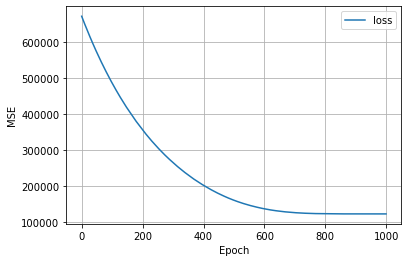

In [28]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

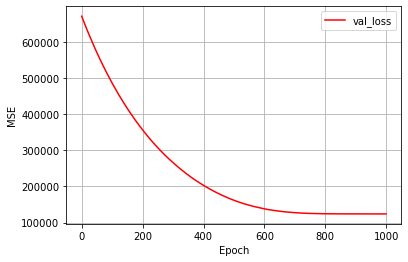

In [29]:
plt.plot(history.history['val_loss'], label='val_loss',color='red')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 6ms/step


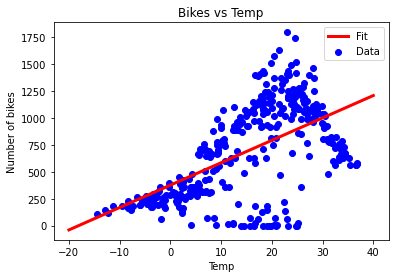

In [30]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# Neural Net

In [31]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [32]:
history = nn_model.fit(
    x_train_temp, y_train_temp,
    validation_data=(x_val_temp, y_val_temp),
    verbose=0, epochs=100
)

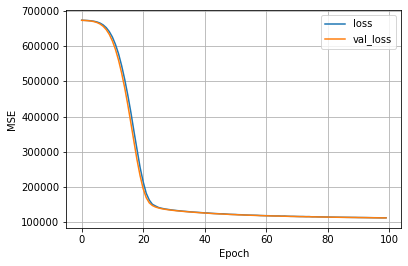

In [33]:
plot_loss(history)

4/4 [==============================] - 0s 4ms/step


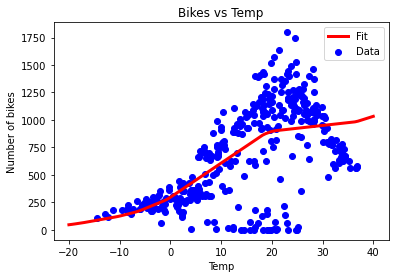

In [34]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [35]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(x_train_all)

In [36]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [37]:
history = nn_model.fit(
    x_train_all, y_train_all,
    validation_data=(x_val_all, y_val_all),
    verbose=0, epochs=1000
)

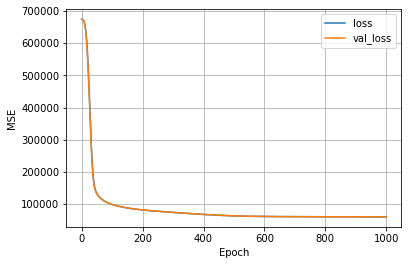

In [38]:
plot_loss(history)

In [39]:
# calculate the MSE for both linear reg and nn
y_pred_lr = all_reg.predict(x_test_all)
y_pred_nn = nn_model.predict(x_test_all)

12/12 [==============================] - 0s 3ms/step


In [40]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [41]:
MSE(y_pred_lr, y_test_all)

95616.74056812629

In [42]:
MSE(y_pred_nn, y_test_all)

59945.2049329048

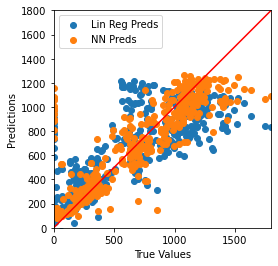

In [43]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")